In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
dataset_url = 'aaditshukla/flipkart-fasion-products-dataset'
download_path = './flipkart_fashion_data'

# Initialize and authenticate the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset and unzip it
api.dataset_download_files(dataset_url, path=download_path, unzip=True)

print(f"Dataset downloaded and extracted to '{download_path}'")

Dataset URL: https://www.kaggle.com/datasets/aaditshukla/flipkart-fasion-products-dataset
Dataset downloaded and extracted to './flipkart_fashion_data'


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math



from scipy.stats  import ttest_ind, levene, mannwhitneyu


In [3]:
#fashion_data = pd.read_excel("flipkart_fashion_data/output.xlsx")
fashion_data = pd.read_json("flipkart_fashion_data/flipkart_fashion_products_dataset.json")

In [4]:
display(fashion_data.sample(5))

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
8050,cea2b0f2-8075-56c3-a2ba-7bb6629495bb,"3,000",3.8,NEBRAS,Clothing and Accessories,2021-02-10 21:37:24,Authentic Mens Slim Fit Jean. This jean is con...,57% off,[https://rukminim1.flixcart.com/image/128/128/...,False,JEAFDVDYTGFWU46M,"[{'Style Code': 'FNCDBBLK'}, {'Ideal For': 'Me...",FRESHAPP,"1,275",Bottomwear,"Slim Men Dark Blue, Blue Jeans (Pack of 2)",https://www.flipkart.com/nebraska-slim-men-dar...
12256,27332d1f-2d95-5141-b2f6-3a24940712e2,749,2.5,ECKO Unl,Clothing and Accessories,2021-02-10 22:29:06,,26% off,[https://rukminim1.flixcart.com/image/128/128/...,False,SHTFZEPSTHFHWNZY,"[{'Pack of': '1'}, {'Style Code': 'EKSH002617'...",SandSMarketing,554,Topwear,Men Slim Fit Solid Cut Away Collar Casual Shirt,https://www.flipkart.com/ecko-unltd-men-solid-...
7883,6425d3d6-0060-5069-9701-beb5276d4946,"1,199",3.7,Wildst,Clothing and Accessories,2021-02-10 21:35:31,Good quality Tshirt for men. It will give them...,71% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFYY47CFEBK2QH,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",RoadTripFashions,339,Topwear,Printed Men Round Neck White T-Shirt,https://www.flipkart.com/wildster-printed-men-...
8796,7212c643-fc65-5244-8482-6ac941ef8d82,"1,256",3.7,V,Clothing and Accessories,2021-02-10 21:48:37,,1% off,[https://rukminim1.flixcart.com/image/128/128/...,False,BRFFV7893WHKNCAU,"[{'Color': 'Multicolor'}, {'Fabric': 'Cotton B...",SIDDHI AGENCIES,"1,239",Innerwear and Swimwear,Men Brief (Pack of 12),https://www.flipkart.com/vip-men-brief/p/itm88...
26269,83c1e3c5-18fe-56bd-b236-579eeb338af9,750,4,,Clothing and Accessories,2021-02-11 00:56:17,New men Cotton Pure White Traditional Double D...,48% off,[https://rukminim1.flixcart.com/image/128/128/...,False,DHTFM6KBJYRAPKZY,"[{'Ideal For': 'Men'}, {'Occasion': 'Festive'}...",ADITYA TEX,390,"Kurtas, Ethnic Sets and Bottoms",ADITYA TEX Double White Maroon boarder Dhoti f...,https://www.flipkart.com/aditya-tex-double-whi...


In [5]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              30000 non-null  object        
 1   actual_price     30000 non-null  object        
 2   average_rating   30000 non-null  object        
 3   brand            30000 non-null  object        
 4   category         30000 non-null  object        
 5   crawled_at       30000 non-null  datetime64[ns]
 6   description      30000 non-null  object        
 7   discount         30000 non-null  object        
 8   images           30000 non-null  object        
 9   out_of_stock     30000 non-null  bool          
 10  pid              30000 non-null  object        
 11  product_details  30000 non-null  object        
 12  seller           30000 non-null  object        
 13  selling_price    30000 non-null  object        
 14  sub_category     30000 non-null  objec

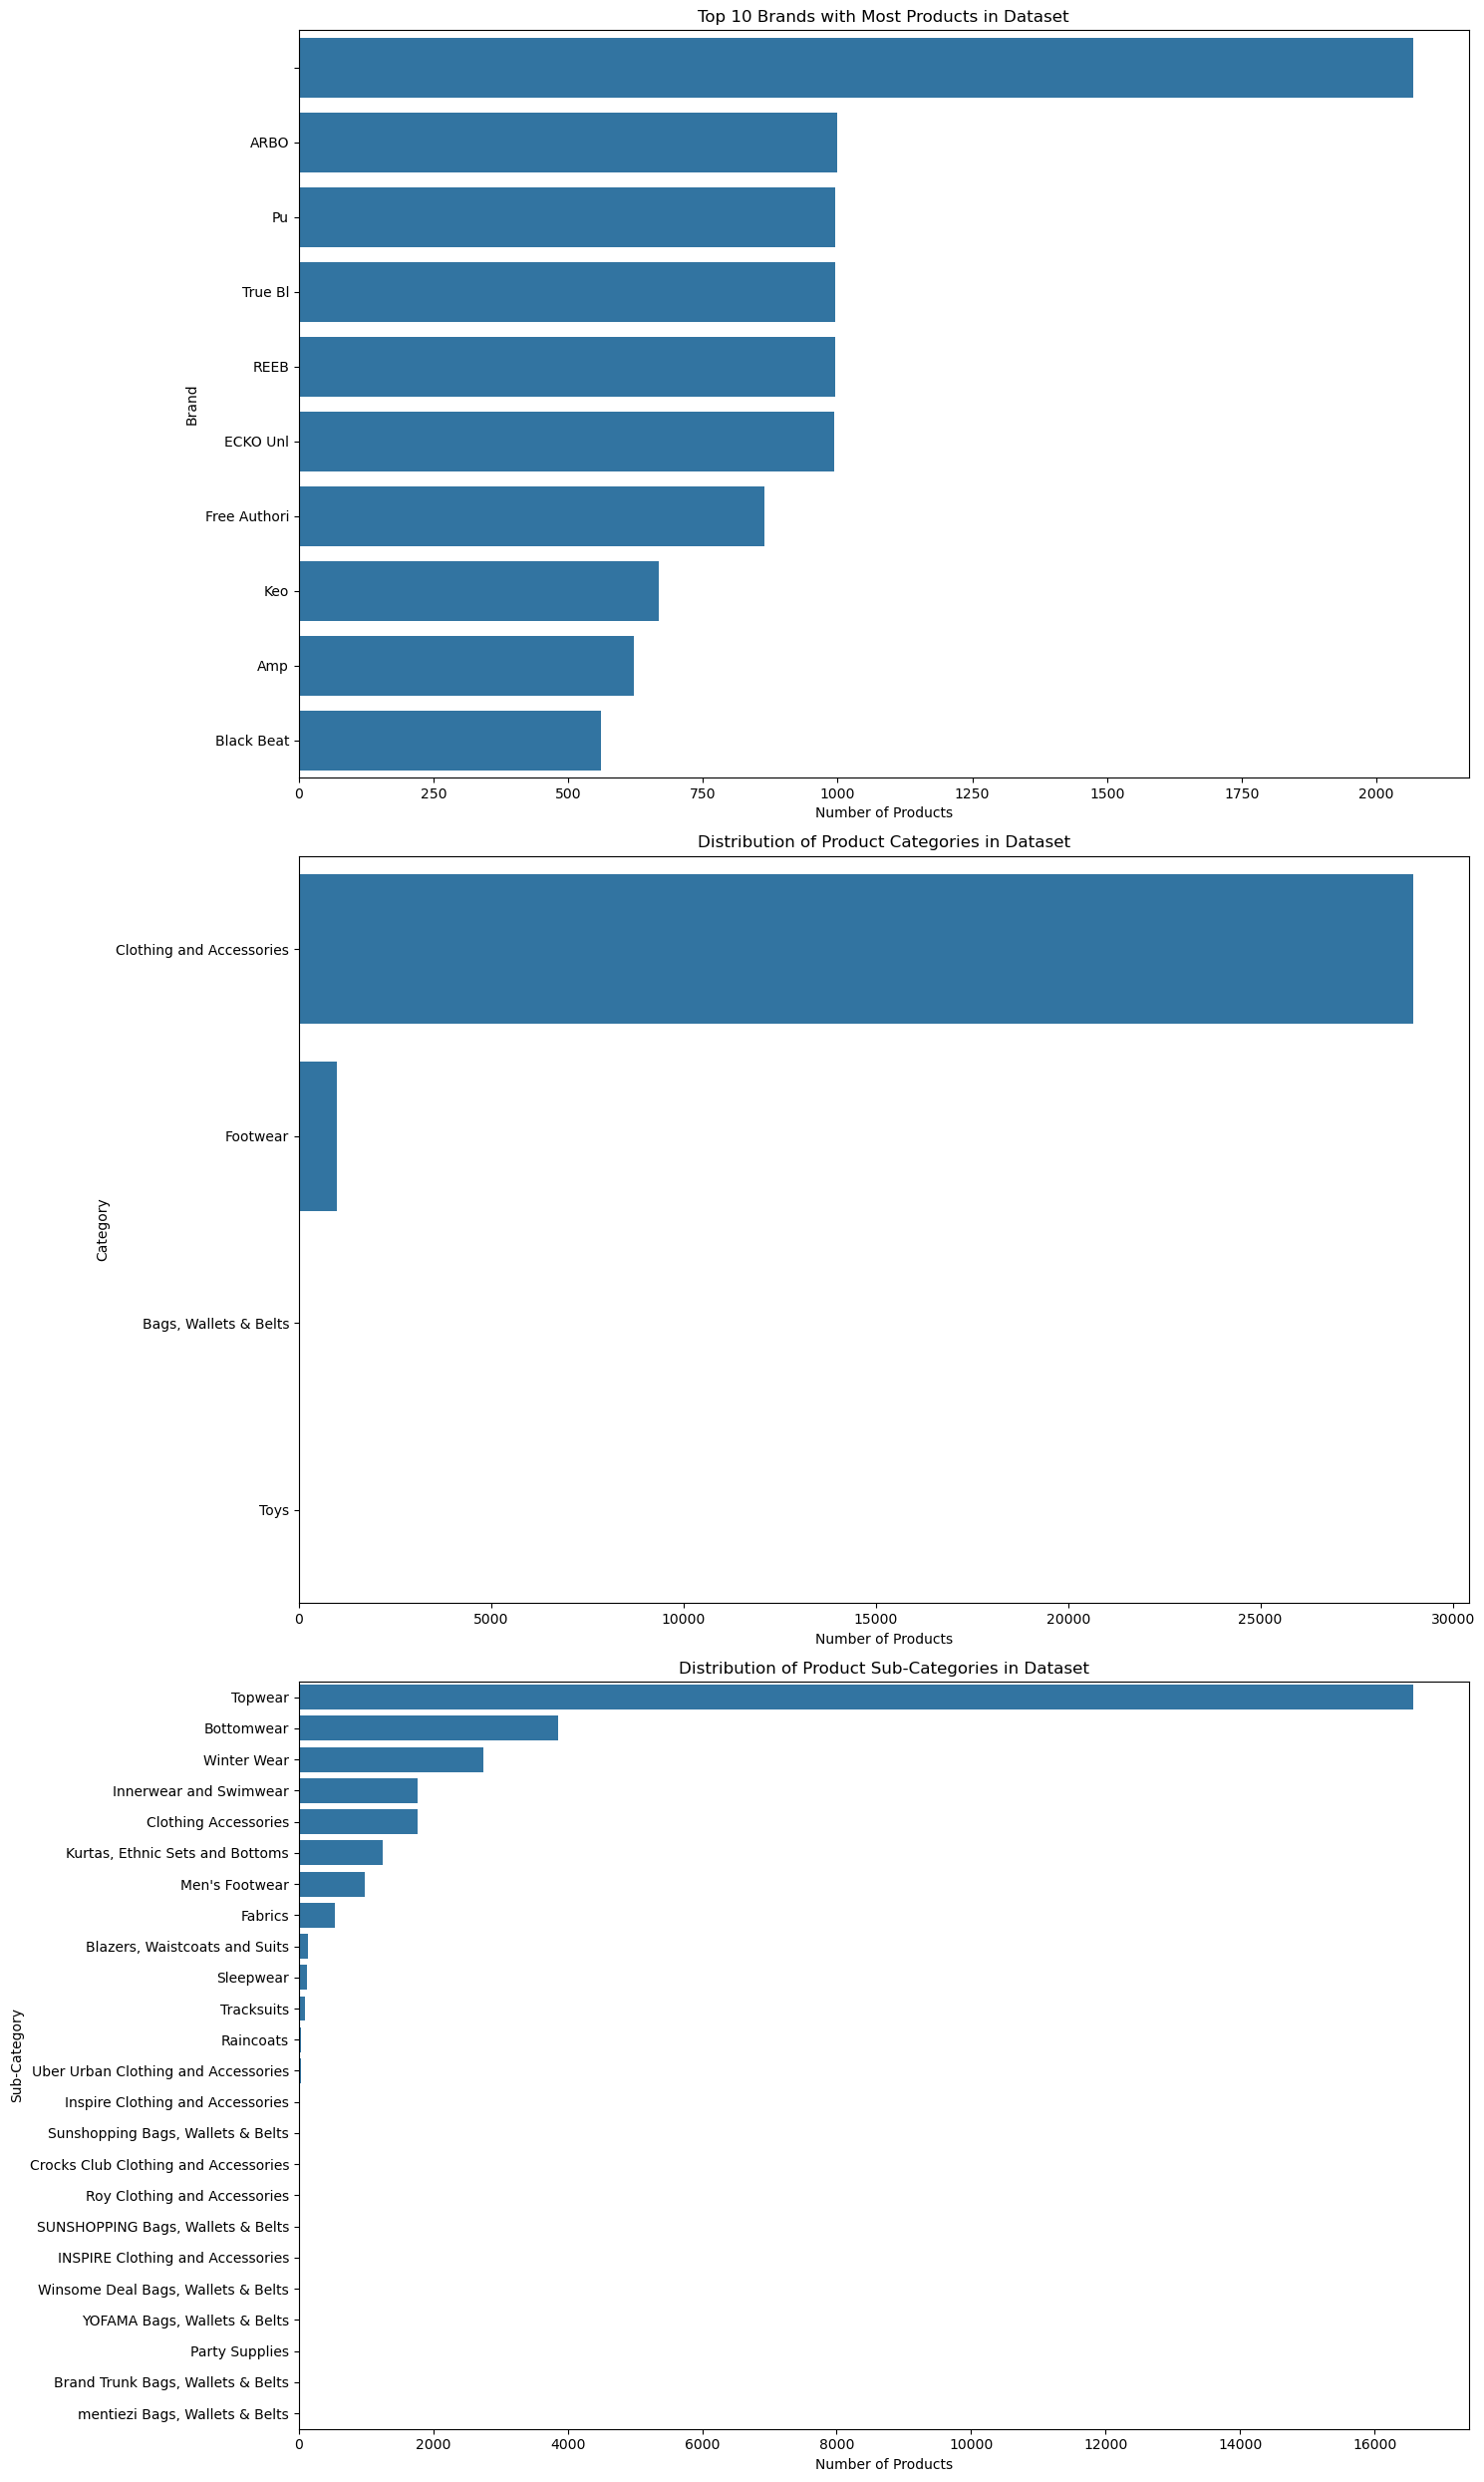

In [6]:
# Top 10 brands with the most products in the cleaned dataset
top_brands = fashion_data['brand'].value_counts()[:10]

# Distribution of product categories in the cleaned dataset
category_dist = fashion_data['category'].value_counts()

# Distribution of product sub-categories in the cleaned dataset
sub_category_dist = fashion_data['sub_category'].value_counts()

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(15, 25))

# Top 10 brands with the most products
sns.barplot(x=top_brands.values, y=top_brands.index, ax=ax[0])
ax[0].set_title('Top 10 Brands with Most Products in Dataset')
ax[0].set_xlabel('Number of Products')
ax[0].set_ylabel('Brand')

# Distribution of product categories
sns.barplot(x=category_dist.values, y=category_dist.index, ax=ax[1])
ax[1].set_title('Distribution of Product Categories in Dataset')
ax[1].set_xlabel('Number of Products')
ax[1].set_ylabel('Category')

# Distribution of product sub-categories
sns.barplot(x=sub_category_dist.values, y=sub_category_dist.index, ax=ax[2])
ax[2].set_title('Distribution of Product Sub-Categories in Dataset')
ax[2].set_xlabel('Number of Products')
ax[2].set_ylabel('Sub-Category')

plt.tight_layout()
plt.show()

In [7]:
# Ensure all columns are displayed
pd.set_option('display.max_rows', None)

In [8]:
from decimal import Decimal

# Replace empty strings with NaN
fashion_data['actual_price'] = fashion_data['actual_price'].replace('', np.nan)

# Remove commas and convert to Decimal, skipping NaN values
fashion_data['actual_price'] = fashion_data['actual_price'].str.replace(',', '', regex=False)
fashion_data['actual_price']= fashion_data['actual_price'].apply(lambda x: Decimal(x) if pd.notna(x) else None)
fashion_data['actual_price'] = fashion_data['actual_price'].astype(float)

# Replace empty strings with 0
fashion_data['discount_percent'] = fashion_data['discount'].replace('', 0).str.replace("% off", "", regex=False)

# convert to Decimal, skipping NaN values
fashion_data['discount_percent']= fashion_data['discount_percent'].apply(lambda x: Decimal(x) if pd.notna(x) else None)
fashion_data['discount_percent'] = fashion_data['discount_percent'].astype(float).replace(np.nan, 0)

fashion_data['average_rating'] = fashion_data['average_rating'].replace('', np.nan).astype(float)
#fashion_data['average_rating'] = fashion_data['average_rating'].astype(float)

# Replace empty strings with 0
fashion_data['selling_price'] = fashion_data['selling_price'].str.replace(",", "").replace("", 0)

# convert to float
fashion_data['selling_price'] = fashion_data['selling_price'].astype(float)

In [9]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id               30000 non-null  object        
 1   actual_price      29137 non-null  float64       
 2   average_rating    27554 non-null  float64       
 3   brand             30000 non-null  object        
 4   category          30000 non-null  object        
 5   crawled_at        30000 non-null  datetime64[ns]
 6   description       30000 non-null  object        
 7   discount          30000 non-null  object        
 8   images            30000 non-null  object        
 9   out_of_stock      30000 non-null  bool          
 10  pid               30000 non-null  object        
 11  product_details   30000 non-null  object        
 12  seller            30000 non-null  object        
 13  selling_price     30000 non-null  float64       
 14  sub_category      3000

In [10]:
fashion_data.describe().T

,count,mean,min,25%,50%,75%,max,std
actual_price,29137.0,1472.617703,150.0,865.0,1249.0,1799.0,12999.0,963.263221
average_rating,27554.0,3.641972,1.0,3.3,3.8,4.1,5.0,0.664232
crawled_at,30000,2021-02-10 22:55:06.673900032,2021-02-10 20:11:51,2021-02-10 21:31:38,2021-02-10 23:01:10,2021-02-11 00:16:29,2021-02-11 01:31:55,NaN
selling_price,30000.0,716.509867,0.0,398.0,549.0,829.0,7999.0,572.449591
discount_percent,30000.0,48.757233,0.0,38.0,52.0,62.0,87.0,18.739056


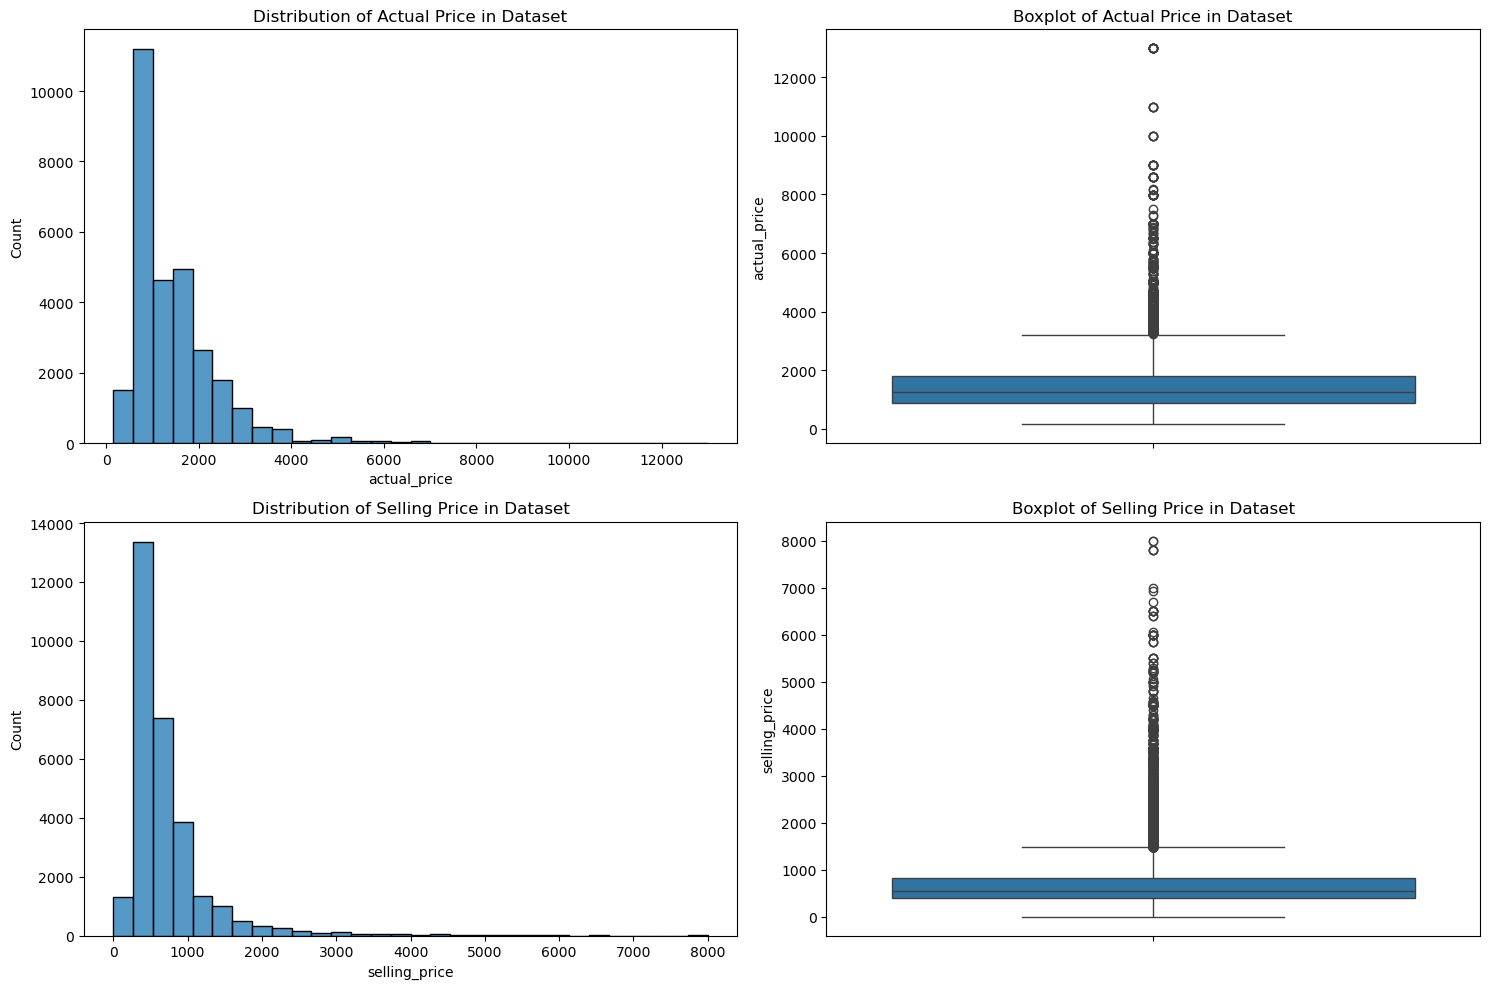

,actual_price,selling_price
actual_price,1.000000,0.857644
selling_price,0.857644,1.000000


In [11]:
# Plotting histograms and boxplots for numerical columns
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 'actual_price'
sns.histplot(fashion_data['actual_price'], bins=30, ax=ax[0, 0])
sns.boxplot(fashion_data['actual_price'], ax=ax[0, 1])
ax[0, 0].set_title('Distribution of Actual Price in Dataset')
ax[0, 1].set_title('Boxplot of Actual Price in Dataset')

# 'selling_price'
sns.histplot(fashion_data['selling_price'], bins=30, ax=ax[1, 0])
sns.boxplot(fashion_data['selling_price'], ax=ax[1, 1])
ax[1, 0].set_title('Distribution of Selling Price in Dataset')
ax[1, 1].set_title('Boxplot of Selling Price in Dataset')

plt.tight_layout()
plt.show()

# Calculate the correlation between numerical columns
correlation = fashion_data[['actual_price', 'selling_price']].corr()

correlation

In [12]:
fashion_data.describe(include=['object'])

,_id,brand,category,description,discount,images,pid,product_details,seller,sub_category,title,url
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,325,4,5194,88,24146,28080,26783,535,24,4579,30000
top,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,,Clothing and Accessories,,60% off,[],SHOFW9HYGJUYX7TG,"[{'Color': 'Black'}, {'Care instructions': 'Du...",,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/yorker-solid-men-mult...
freq,1,2068,28971,11980,2335,778,25,112,1741,16575,856,1


In [13]:

fashion_data[['actual_price', 'selling_price', 'discount', 'average_rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual_price    29137 non-null  float64
 1   selling_price   30000 non-null  float64
 2   discount        30000 non-null  object 
 3   average_rating  27554 non-null  float64
dtypes: float64(3), object(1)
memory usage: 937.6+ KB


In [14]:
fashion_data.groupby('category').size().sort_values(ascending=False)

category
Clothing and Accessories    28971
Footwear                      987
Bags, Wallets & Belts          41
Toys                            1
dtype: int64

In [15]:
clothing_data = fashion_data[fashion_data['category'] == 'Clothing and Accessories']
clothing_data.groupby('category').size().sort_values(ascending=False)

category
Clothing and Accessories    28971
dtype: int64

In [16]:
# clothing_data.groupby('category').size().sort_values(ascending=False)
clothing_data[['actual_price', 'selling_price', 'discount', 'average_rating']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 28971 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   actual_price    28118 non-null  float64
 1   selling_price   28971 non-null  float64
 2   discount        28971 non-null  object 
 3   average_rating  26528 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [20]:
fashion_data[fashion_data['actual_price'].isna()&fashion_data['discount_percent']!=0.0].head(5)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url,discount_percent


In [21]:
import scipy.stats as stats
# Perform one-way ANOVA
groups = [clothing_data.loc[clothing_data["sub_category"] == g, "selling_price"] for g in clothing_data["sub_category"].unique()]
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

F-statistic: 644.4595, P-value: 0.0000


In [22]:
fashion_data.head(3).T

,0,1,2
_id,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,893e6980-f2a0-531f-b056-34dd63fe912c,eb4c8eab-8206-59d0-bcd1-a724d96bf74f
actual_price,2999.0,1499.0,2999.0
average_rating,3.9,3.9,3.9
brand,York,York,York
category,Clothing and Accessories,Clothing and Accessories,Clothing and Accessories
crawled_at,2021-02-10 20:11:51,2021-02-10 20:11:52,2021-02-10 20:11:52
description,Yorker trackpants made from 100% rich combed c...,Yorker trackpants made from 100% rich combed c...,Yorker trackpants made from 100% rich combed c...
discount,69% off,66% off,68% off
images,[https://rukminim1.flixcart.com/image/128/128/...,[https://rukminim1.flixcart.com/image/128/128/...,[https://rukminim1.flixcart.com/image/128/128/...
out_of_stock,False,False,False


C:\Users\M0547\AppData\Local\Temp\ipykernel_57756\1346067754.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="viridis")


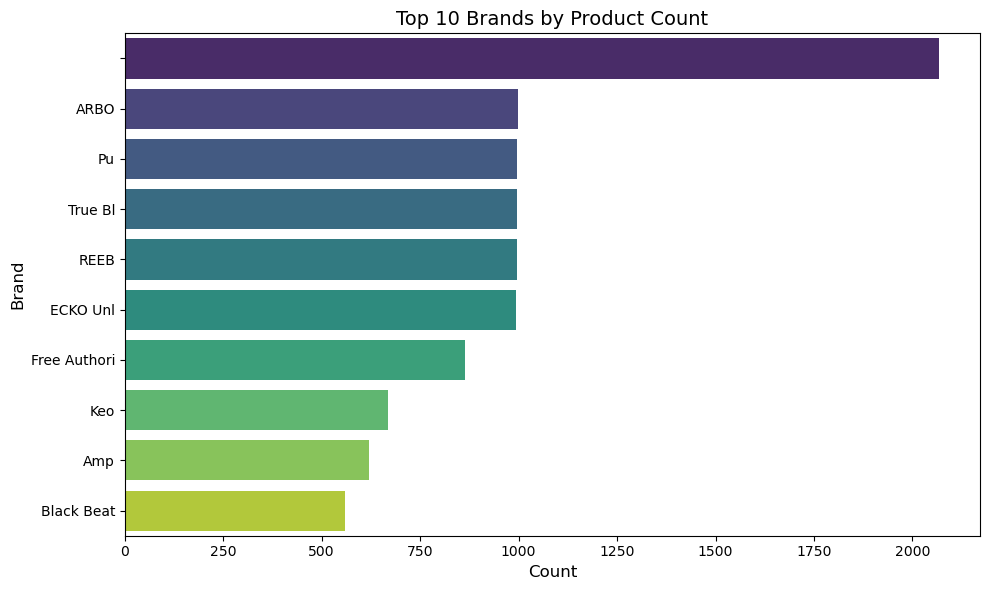

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of products by brand
brand_counts = fashion_data['brand'].value_counts().head(10)  # Top 10 brands

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="viridis")
plt.title('Top 10 Brands by Product Count', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\M0547\AppData\Local\Temp\ipykernel_57756\1062526327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_counts.values, y=subcategory_counts.index, palette="coolwarm")


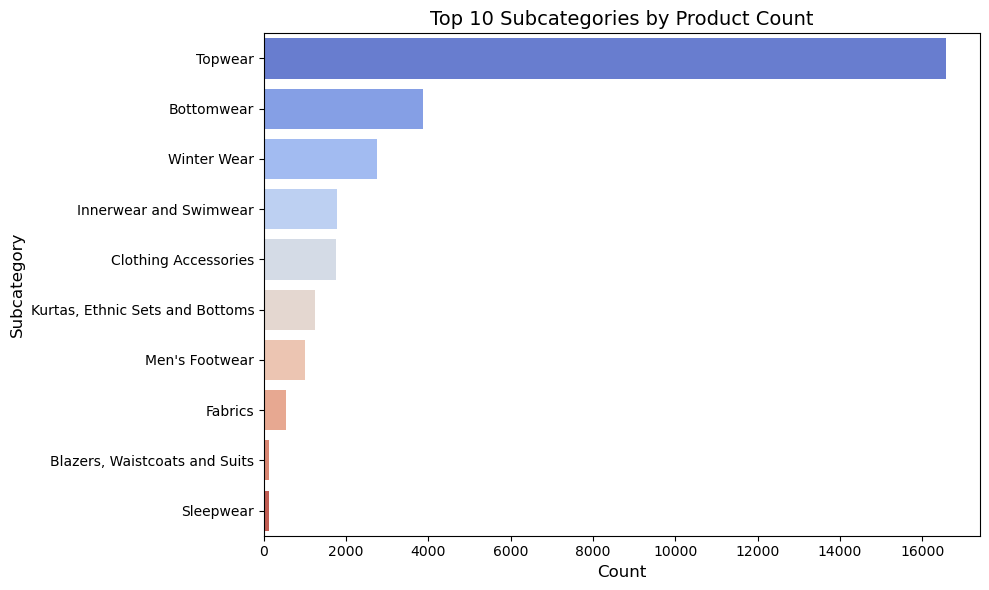

In [24]:

# Count the number of products by sub_category
subcategory_counts = fashion_data['sub_category'].value_counts().head(10)  # Top 10 subcategories

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_counts.values, y=subcategory_counts.index, palette="coolwarm")
plt.title('Top 10 Subcategories by Product Count', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Subcategory', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\M0547\AppData\Local\Temp\ipykernel_57756\2203739630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_avg_rating.values, y=subcategory_avg_rating.index, palette="viridis")


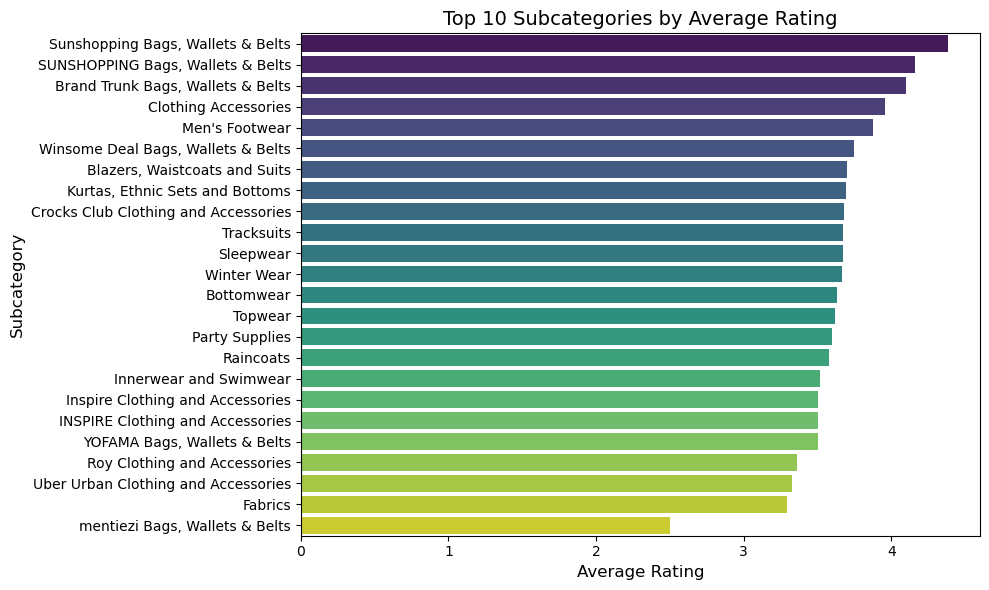

In [25]:

# Calculate the average rating by sub_category
subcategory_avg_rating = fashion_data.groupby('sub_category')['average_rating'].mean().sort_values(ascending=False).head(30)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_avg_rating.values, y=subcategory_avg_rating.index, palette="viridis")
plt.title('Top 10 Subcategories by Average Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Subcategory', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\M0547\AppData\Local\Temp\ipykernel_57756\685466297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_rating.values, y=category_avg_rating.index, palette="coolwarm")


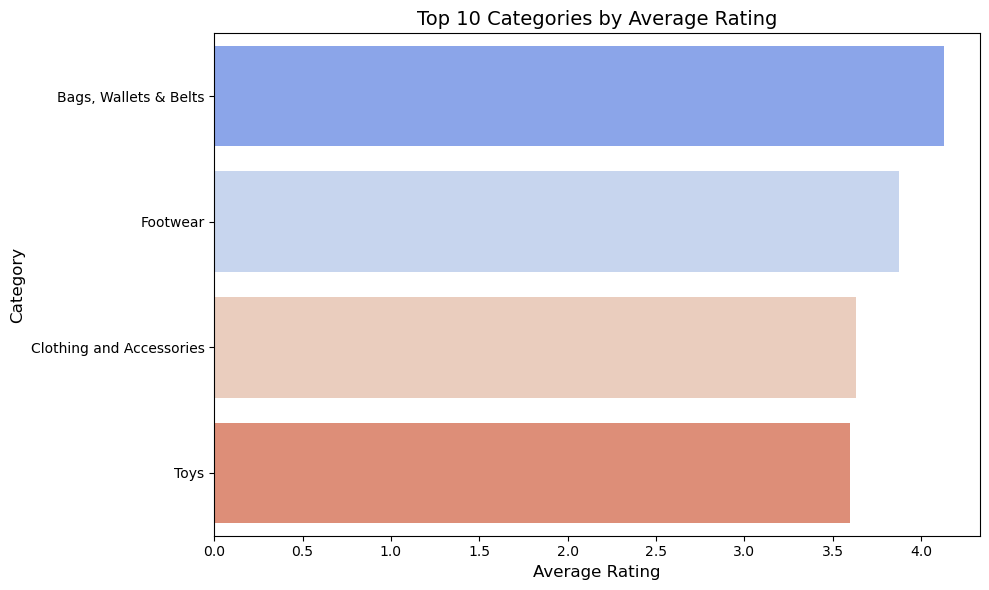

In [26]:
# Calculate the average rating by category
category_avg_rating = fashion_data.groupby('category')['average_rating'].mean().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_rating.values, y=category_avg_rating.index, palette="coolwarm")
plt.title('Top 10 Categories by Average Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
# Select date-type columns
date_columns = fashion_data.select_dtypes(include=['datetime64[ns]', 'datetime64'])

# Calculate descriptive statistics for each date column
date_stats = date_columns.agg(['min', 'max', 'nunique', 'count'])
date_stats.loc['range'] = date_stats.loc['max'] - date_stats.loc['min']

# Display the results
print(date_stats)

                  crawled_at
min      2021-02-10 20:11:51
max      2021-02-11 01:31:55
nunique                17188
count                  30000
range        0 days 05:20:04


In [28]:
# Step 1: Explode 'product_details' column while maintaining the original index
src_fashion_data = fashion_data
src_fashion_data['src_product_details'] = fashion_data['product_details']
exploded = src_fashion_data.explode('product_details', ignore_index=True)

# Step 2: Normalize the exploded 'product_details'
exploded_normalized = pd.json_normalize(exploded['product_details'])

# Step 3: Merge the exploded normalized product details back to the original data
exploded_df = pd.concat([exploded.drop(columns=['product_details']), exploded_normalized], axis=1)


In [29]:
# Group by '_id' and get the max value for each column
grouped_df = exploded_df.groupby('_id').first()


In [30]:
grouped_df.head(5).T

_id,00005493-1875-5b43-8061-20c7d0cbe6b1,0003c6ae-73c1-5f18-a5e6-778e5f7b8804,000636e4-07c0-5d26-adfd-f6114389edb7,000cb2a8-7ae7-5905-a828-9a9ebc9947b8,000cb961-8d64-513b-896a-ab29d85fb97d
actual_price,545.0,999.0,1049.0,1799.0,NaN
average_rating,3.8,2.3,2.5,3.9,NaN
brand,AXMA,T10 Spor,ECKO Unl,Keo,HUMANITY ORIGINA
category,Clothing and Accessories,Clothing and Accessories,Clothing and Accessories,Clothing and Accessories,Clothing and Accessories
crawled_at,2021-02-10 20:42:41,2021-02-11 00:07:41,2021-02-10 22:28:44,2021-02-11 01:25:31,2021-02-10 23:20:02
description,,Micro Lite Uni Tee Run,ECKO Unltd YD CHECK Cotton Woven Slim Fit Kha...,EXPERIENCE THE AMAZING COMFORT OF A KEOTI POLO...,
discount,10% off,50% off,30% off,63% off,
images,[https://rukminim1.flixcart.com/image/128/128/...,[https://rukminim1.flixcart.com/image/128/128/...,[https://rukminim1.flixcart.com/image/128/128/...,[https://rukminim1.flixcart.com/image/128/128/...,[https://rukminim1.flixcart.com/image/128/128/...
out_of_stock,False,False,False,False,False
pid,TSHF6ZJMQHBFAMQP,TSHEQ9SJKZSHKGYE,SHTFV5GHAZWWGCQH,TSHFGHV8EXTH8CZ8,TSHFZR5AZNWCYKDH


In [31]:
grouped_df.shape


(30000, 144)

In [32]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 00005493-1875-5b43-8061-20c7d0cbe6b1 to fffe3584-2c47-56a7-9bad-6fe02eaf634f
Columns: 144 entries, actual_price to Coat Type
dtypes: bool(1), datetime64[ns](1), float64(4), object(138)
memory usage: 33.0+ MB


In [33]:
grouped_df = grouped_df.convert_dtypes()

In [34]:
grouped_df.describe(include='string').T

,count,unique,top,freq
brand,30000,325,,2068
category,30000,4,Clothing and Accessories,28971
description,30000,5194,,11980
discount,30000,88,60% off,2335
pid,30000,28080,TSHFYZH5YH3X8KYC,25
seller,30000,535,,1741
sub_category,30000,24,Topwear,16575
title,30000,4579,Printed Men Round Neck Black T-Shirt,856
url,30000,30000,https://www.flipkart.com/axmann-solid-men-polo...,1
Style Code,27568,23246,sdm667,77


In [35]:
grouped_df.describe(include='object').T

,count,unique,top,freq
images,30000,24146,[],778
src_product_details,30000,26783,"[{'Color': 'Black'}, {'Care instructions': 'Du...",112


In [36]:
from scipy.stats import kurtosis

result = fashion_data.groupby('sub_category' , observed=True)['selling_price'].agg(
    Count = 'count',
    Mean = 'mean', 
    Median = 'median', 
    Kurtosis =  lambda x:kurtosis(x, fisher = True, bias = False)
)

#result.order('Count')
result

C:\Users\M0547\AppData\Local\Temp\ipykernel_57756\1024637732.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Kurtosis =  lambda x:kurtosis(x, fisher = True, bias = False)


,Count,Mean,Median,Kurtosis
sub_category,,,,
"Blazers, Waistcoats and Suits",136,2004.080882,1519.0,3.998792
Bottomwear,3862,1118.433454,870.0,9.719398
"Brand Trunk Bags, Wallets & Belts",1,125.000000,125.0,NaN
Clothing Accessories,1760,392.432386,399.0,3.176636
Crocks Club Clothing and Accessories,15,945.666667,999.0,-0.407711
Fabrics,535,381.566355,379.0,76.968055
INSPIRE Clothing and Accessories,4,499.000000,499.0,NaN
Innerwear and Swimwear,1774,488.047914,400.0,1.398283
Inspire Clothing and Accessories,23,831.173913,899.0,-1.201304


In [37]:
from scipy.stats import kurtosis

result = fashion_data.groupby('category' , observed=True).agg(
    selling_price_Mean = ('selling_price','mean'),
    selling_price_Median = ('selling_price','median'), 
    selling_price_Kurtosis = ('selling_price', lambda x:kurtosis(x, fisher = True, bias = False)),
    average_rating_Mean = ('average_rating','mean'),
    average_rating_Median = ('average_rating','median'), 
    average_rating_Kurtosis = ('average_rating', lambda x:kurtosis(x, fisher = True, bias = False)), 
    my_count = ('_id','count')

)

result.T

category,"Bags, Wallets & Belts",Clothing and Accessories,Footwear,Toys
selling_price_Mean,258.512195,724.510580,501.227964,189.0
selling_price_Median,225.000000,550.000000,320.000000,189.0
selling_price_Kurtosis,5.592735,21.578542,7.359870,NaN
average_rating_Mean,4.126829,3.632524,3.876524,3.6
average_rating_Median,4.400000,3.800000,3.800000,3.6
average_rating_Kurtosis,3.640536,NaN,NaN,NaN
my_count,41.000000,28971.000000,987.000000,1.0


<Axes: >

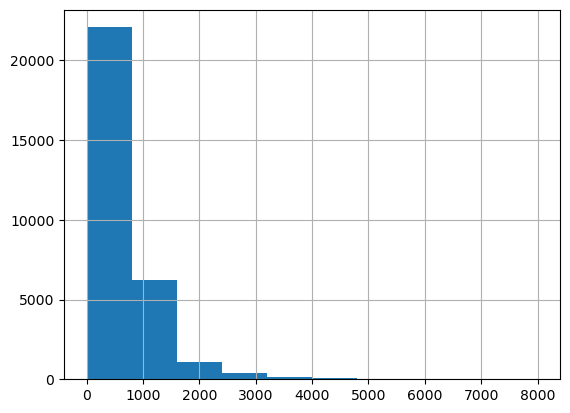

In [38]:
fashion_data['selling_price'].hist()

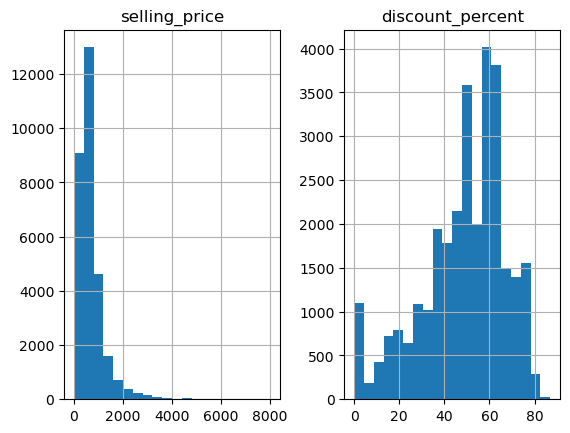

In [39]:
fashion_data[['selling_price', 'discount_percent']].hist(bins=20);



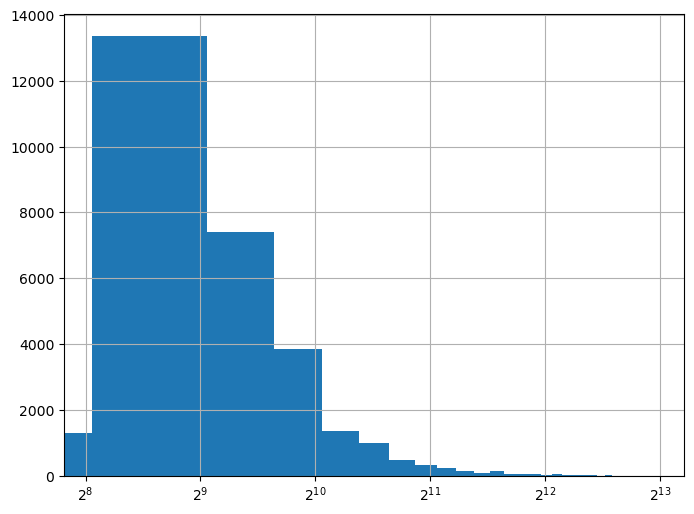

In [40]:
plt.figure(figsize=(8,6))
fashion_data['selling_price'].hist(bins=30, figsize=(8,6) )
plt.xscale('log', base = 2)
plt.show();

c:\Users\M0547\anaconda3\envs\p12\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


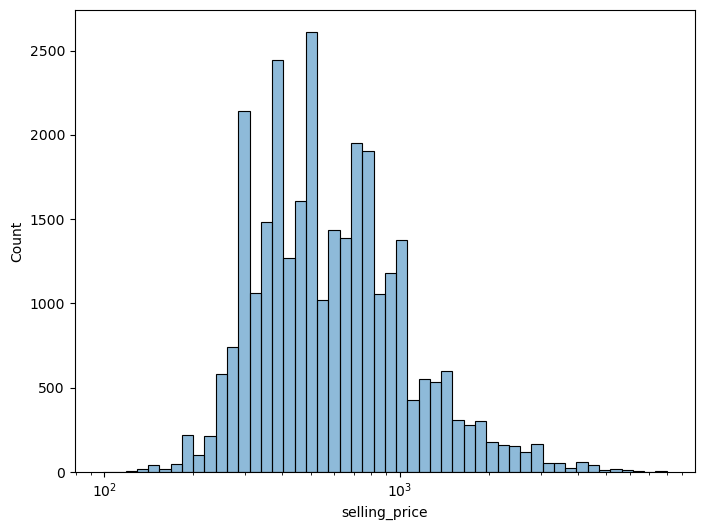

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(fashion_data['selling_price'], bins= 50, kde = True, log_scale=(True, False))
plt.show();